<a href="https://colab.research.google.com/github/ibrahimmhammed/projects/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

**Read Files**

In [ ]:
data = pd.read_csv("//content//Mall_Customers.csv")

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

**Information about data**

In [ ]:
data.head()
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Transforming datatype (object to numeric)**

In [ ]:
la = LabelEncoder()
data.Gender=la.fit_transform(data.Gender)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


**What is the best number of clusters**

In [ ]:
number_clusters = []
j = []

for i in range(1,12): # to specify best number of clusters
  model= KMeans(n_clusters=i)
  model.fit(data)
  model.inertia_
  number_clusters.append(i)
  j.append(model.inertia_)

pd.DataFrame(number_clusters,j)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,0
975512.060000,1
387065.713771,2
271384.508783,3
195401.198560,4
157252.798018,5
122628.062406,6
105756.556476,7
86146.217624,8
77010.159058,9
68950.786684,10


Text(0, 0.5, 'error perc')

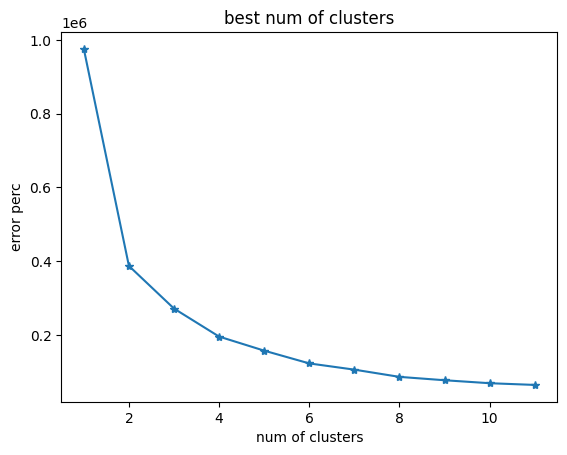

In [ ]:
plt.plot(number_clusters,j,marker="*") #elbow method
plt.title('best num of clusters')
plt.xlabel('num of clusters')
plt.ylabel('error perc')

Creating model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


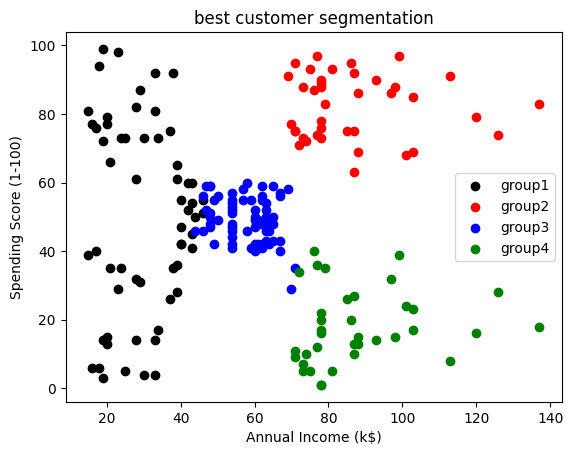

In [ ]:
model = KMeans(n_clusters=4)
model.fit(data)
pred = model.predict(data)

data['customer segmentation']=pred  #adding predicting clusters to the unlabeled data

group_1= data[data['customer segmentation']==0]
group_2= data[data['customer segmentation']==1]
group_3= data[data['customer segmentation']==2]
group_4= data[data['customer segmentation']==3]

plt.scatter(group_1["Annual Income (k$)"],group_1['Spending Score (1-100)'],label="group1",c="k")
plt.scatter(group_2["Annual Income (k$)"],group_2['Spending Score (1-100)'],label="group2",c="red")
plt.scatter(group_3["Annual Income (k$)"],group_3['Spending Score (1-100)'],label="group3",c="blue")
plt.scatter(group_4["Annual Income (k$)"],group_4['Spending Score (1-100)'],label="group4",c="green")
plt.title("best customer segmentation")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()



**Data analysis**

2    66
0    59
1    39
3    36
Name: customer segmentation, dtype: int64


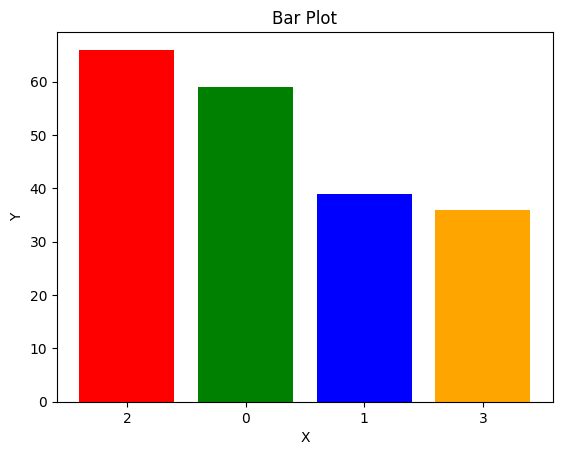

In [ ]:
counts = data["customer segmentation"].value_counts()
print (counts)
x = [2, 0, 1, 3]
y = [66, 59, 39, 36]

# Set custom colors for the bars
colors = ['red', 'green', 'blue', 'orange']

# Set the x-axis tick locations and labels
x_ticks = np.arange(len(x))

plt.bar(x_ticks, y, color=colors)
plt.title("Bar Plot")
plt.xlabel("X")
plt.ylabel("Y")

# Set the x-axis tick locations and labels
plt.xticks(x_ticks, x)

plt.show()

Axes(0.22375,0.11;0.5775x0.77)


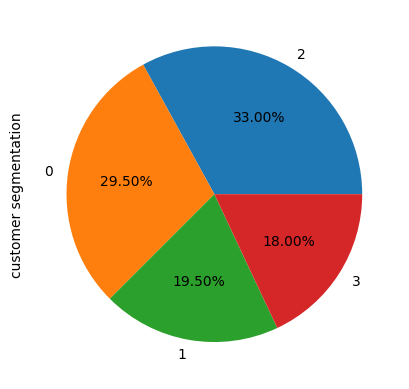

In [ ]:
counts = data["customer segmentation"].value_counts().plot.pie(autopct="%0.2f%%")
print (counts)

TypeError: ignored